# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

**Цель исследования:**

1. Определить рыночную стоимость объектов недвижимости.
2. Построить автоматизированную систему, которая отследит аномалии и мошенническую деятельность.
3. Установить, какие факторы влияют на ценообразование квартир.
    
    **Ход исследования:**
    
    Получу данные о недвижимости из файла <span style="background-color: #E5ECEB">'/datasets/real_estate_data.csv'</span>. О качестве данных не известно. Поэтому перед тем, как приступить к исследованиям, понадобится обзор данных.
    
    Проверю данные на ошибки и оценю их влияние на исследование. Затем, на этапе предобработки я поищу возможность исправить все ошибки данных, которые не приведут к искажению конечного результата. Далее, создам необходимые столбцы, и приступлю к проведению исследовательского анализа.
    
    Таким образом, моё исследование пройдет в семь этапов:
    
    - Обзор данных.
    - Предобработка данных.
    - Расчеты и добавление результатов в таблицу.
    - Проведение анализа для Ленинградской области.
    - Проведение анализа для Санкт-Петербурга.
    - Исследование различия факторов влияющих на ценнобразование стоимости квартир.
    - Общий вывод.

## Откройем файл с данными и изучим общую информацию. 

In [1]:
# Импортируем библиотеки и читаем файл 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

try:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
except:
    print('wrong somethings')

<b>Выведем общую информацию и первые 20 строчек на экран.</b>

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [3]:
data.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


**Вывод:** <br> Можно заметить, что довольно много столбцов имеют пропущенные значения. Нужно будет выяснить причину. К тому же, некоторые столбцы имеют несоответсвующий тип данных.


**Построем общую гистограмму  для всех числовых столбцов таблицы**

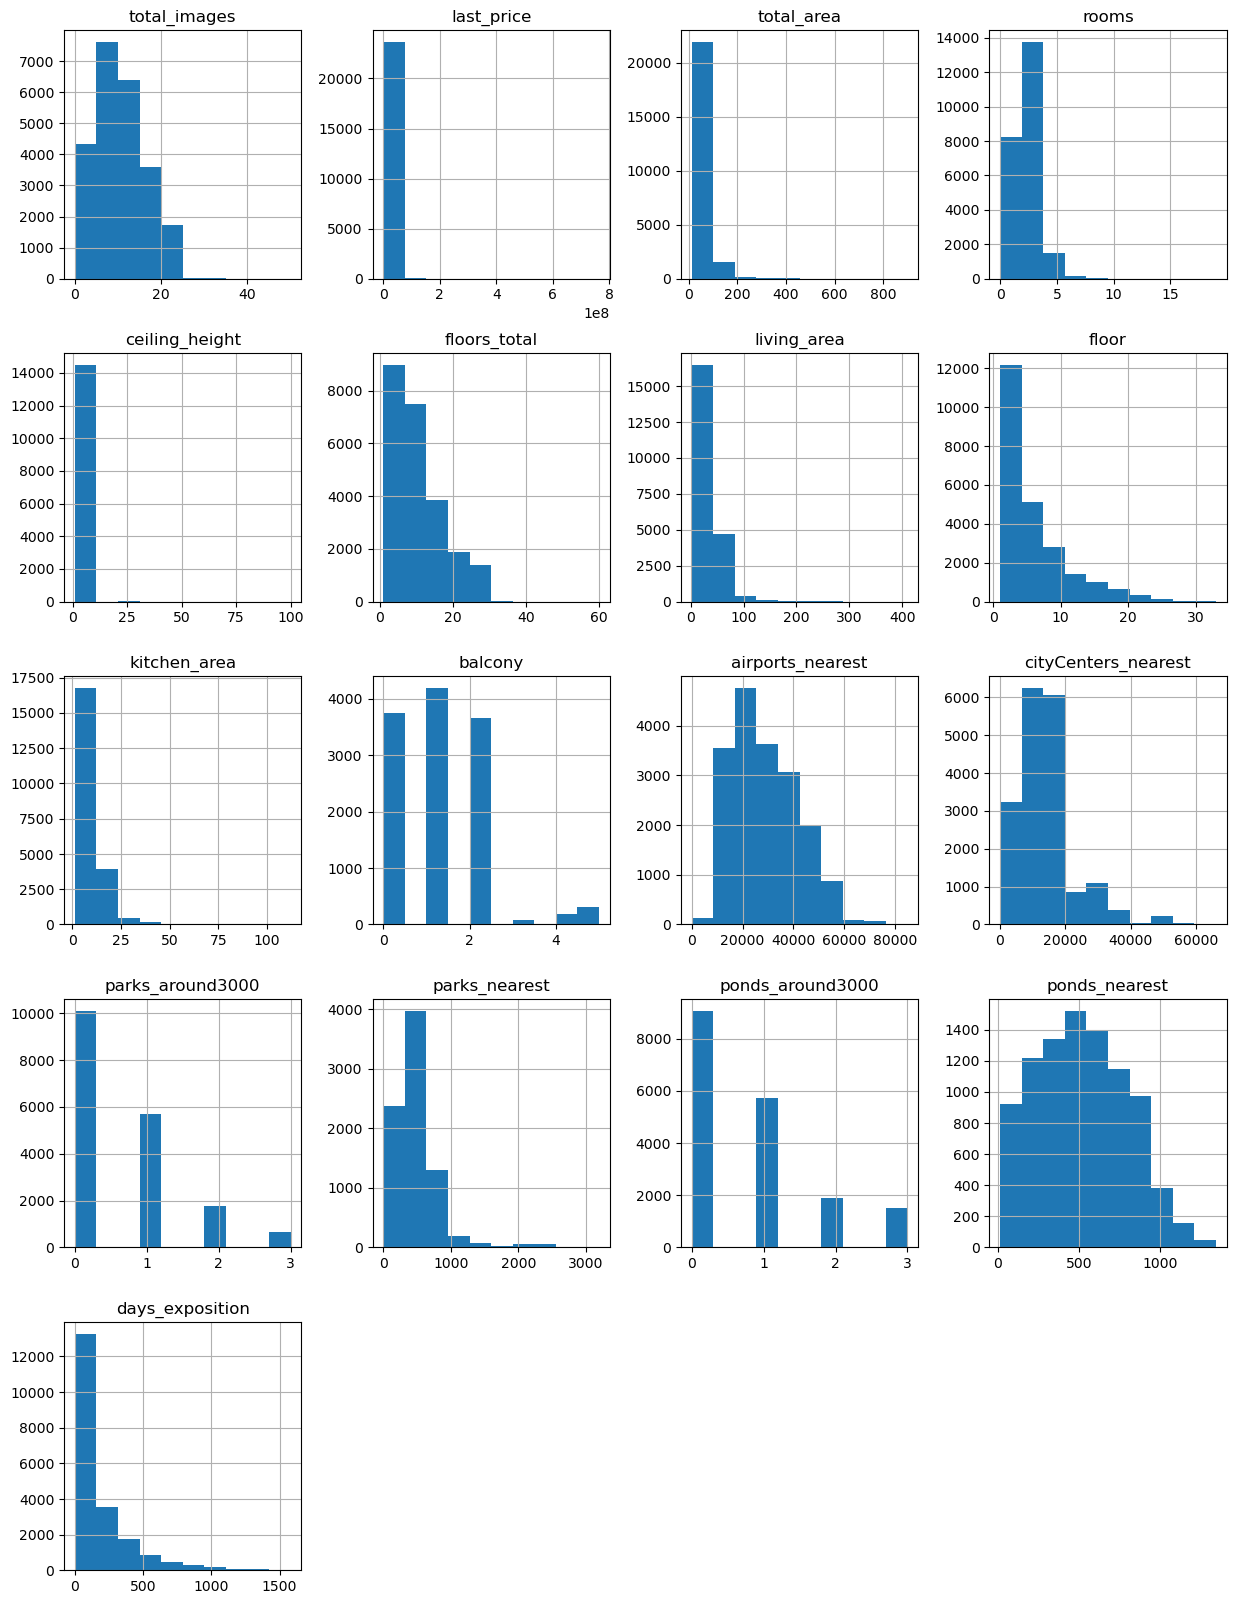

In [4]:
data.hist(grid=True, figsize=(15, 20));

## Предобработка данных

###  Пропуски в данных

**Необходимо найти пропуски в данных и по возможности заполнить их.**

In [5]:
# Выведем на экран количество пропущенных для каждого столбца
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [6]:
#Проверим колличество пропусков в % 
pd.DataFrame(round(data.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
total_images,0.000000
last_price,0.000000
total_area,0.000000
first_day_exposition,0.000000
rooms,0.000000
ceiling_height,39.000000
floors_total,0.000000
living_area,8.000000
floor,0.000000
is_apartment,88.000000


**Вывод:**
    
   В данных творится просто ужас. В столбце  **is_apartment** не хватает 88% данных. В **ceiling_height** и **balcony**, 39% и 49% соответственно. В **ponds_nearest** и **parks_nearest**, 62% и 66% соответственно. В остальных столбцах тоже не лучше.

In [7]:
# проверим дубликаты и выведем их сумму
data.duplicated().sum()

0

**Вывод** <br>
Можно заметить, что пропусков очень много. Разберем по подробнее:
- **_ceiling_height_** - Высота потолков категориальное значение, и обычно колеблется в диапазоне от 2 до 3 метров. Однако пропущенных значений слишком много, а замена исказит анализ, поэтому *оставим пропуски*
- **_floors_total_** - Мало пустых значений, из-за чего влияние на анализ будет минимальным *можно оставить*
- **_living_area_** - Количественное значение, замена не возможна без искажений *оставим пропуски*
- **_is_appartment_** - Слишком много пропущенных значений, хотя, это и bool  *оставляем* все как есть.
- **_kitchen area_** -  Количественное значение, замена не возможна без искажений *оставим пропуски*
- **_balcony_** - Если продавец не указал число балконов, то, скорее всего, их нет. Такие пропуски *заменим* на 0.
- **_locality_name_** - Приведем столбцы к одному  типу. *Заменим* NaN(float) на unknown(str).
- **_airports_nearest_, _parks_nearest_, _ponds_nearest_** - Отсутствие значений в данных, скорее всего, обусловленно отсутствием поблизости парков, прудов и аэропортов. *Оставим их пустыми*. 
- **_ponds_around3000_, _parks_around3000_** - Логика такая же, как и с балконами. *Оставим пропуски*.
- **_cityCenters_nearest_** - Количество пропусков, практически идентичны количеству пропусков для _airports_nearest_, _parks_around3000_, _ponds_around3000_. Скорее всего, речь идет о маленьких городах или посёлках. *Оставим пропуски*.
- **_days_exposition_** - Количественное значение, замена не возможна без искажений *оставим пропуски*

In [8]:
# Приведем названия столбцов  к виду snake_case
data = data.rename(columns={
                     'parks_around3000': 'parks_around_3000',
                     'ponds_around3000': 'ponds_around_3000',
                     'cityCenters_nearest': 'city_centers_nearest'
                    }
)
# Проверим выведя на экран
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around_3000', 'parks_nearest', 'ponds_around_3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

In [9]:
#Заменим пропущенные значения на 0 там где это возможно
data['balcony'] = data['balcony'].fillna(0)
data['parks_around_3000'] = data['parks_around_3000'].fillna(0)
data['ponds_around_3000'] = data['ponds_around_3000'].fillna(0)

In [10]:
#Заменим пропущенные значения в locality_name на 'unknown'
data['locality_name'] = data['locality_name'].fillna('unknown')

In [11]:
# Выведем на экран количество пропущенных для каждого столбца после замен пропусков
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name               0
airports_nearest         5542
city_centers_nearest     5519
parks_around_3000           0
parks_nearest           15620
ponds_around_3000           0
ponds_nearest           14589
days_exposition          3181
dtype: int64

### Тип данных

**В некоторых данных нужно заменить тип столбцов, так, например привести *first_day_exposition* к типу *datetime*. Так же, приведем целочисленые значения к типу *int*.**

In [12]:
# Приведем first_day_exposition к типу datetime.
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'],  format='%Y-%m-%dT%H:%M:%S' )

In [13]:
# Для удобства составим список значений, которые нужно привести к типу int
changeable_col = ['last_price', 'rooms', 'floor', 'balcony', 'parks_around_3000', 'ponds_around_3000',]

In [14]:
# Переберем значения из списка циклом и изменим тип
for col in changeable_col:
    try:
        data[col] = data[col].astype('int')
    except: print('error:', col)

In [15]:
# Посмотрим тип
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  int32         
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int32         
 5   ceiling_height        14504 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int32         
 9   is_apartment          2775 non-null   object        
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

### Неявные дубликаты

**Посмотрим уникальные значения для _locality_name_, так как обычно неявные дубликаты характерны для столбцов с названиями.**

In [16]:
# Выведем уникальные значения
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [17]:
# Посмотрим количество уникальных значений
len(data['locality_name'].unique())

365

**Видим, что есть дубликаты такие, как: 'поселок', 'посёлок', 'поселок городского типа', 'посёлок городского типа', 'городской посёлок', 'городской поселок'.  Приведем их к типу:  посёлок + название посёлка.**

In [18]:
# Для удобства создадим функцию приводящую значения к нужному виду
def replace_col(row):
    try:
        if 'поселок' in row:
            row = row.replace('поселок', 'посёлок')
        if 'городского' in row:
                row = row.replace('городского типа', '')
        if 'городской' in row:
                row = row.replace('городской', '')
        return row
    except: 
        return print('Errors:' + row)

In [19]:
# Применим функцию
data['locality_name'] = data['locality_name'].apply(replace_col)

In [20]:
# Выведем уникальные значения
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', ' посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'посёлок  Красный Бор', 'Гатчина', 'деревня Фёдоровское', 'Выборг',
       'Кронштадт', 'Кировск', 'деревня Новое Девяткино',
       'посёлок Металлострой', 'посёлок  Лебяжье', 'посёлок  Сиверский',
       'посёлок Молодцово', 'посёлок  Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'посёлок  Ефимовский', 'посёлок Плодовое', 'деревня Заклинье',
       'посёлок Торковичи', 'посёлок Первомайское', 'Красное Село',
       'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', 'посёлок Новый Свет', 'Сланцы',
       'село Путилово', 'Ивангород', 'Мурино', 'Шлиссельбург',
       'Никольское', '

In [21]:
# Посмотрим количество уникальных значений после замены дубликатов
len(data['locality_name'].unique())

331

### Аномальные значения

 **Посмотрим гистограммы и описание данных таблицы, для первичного просмотра аномалий.**

In [22]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,23699.000000,18157.000000,18180.000000,23699.000000,8079.000000,23699.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,0.591080,28793.672193,14191.277833,0.469049,490.804555,0.590911,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,0.959298,12630.880622,8608.386210,0.748534,342.317995,0.883999,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,0.000000,26726.000000,13098.500000,0.000000,455.000000,0.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,1.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


**Вывод:**<br>
Видны аномальные значения в столбцах:  
- ceiling_height
- kitchen_area
- rooms
- last_price

Разберем каждый по отдельности.

####  Аномалии в ceiling_height

**В столбце  _ceiling_height_ не хватает больше 40% данных. Вдобавок на гистограмме видны аномальные значения. Узнаем среднее, медианное, максимальное и минимальное значение высоты потолков, чтобы подтвердить наличие аномалии.**

In [23]:
#Выведем диапазон значений высоты потолков
data['ceiling_height'].describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

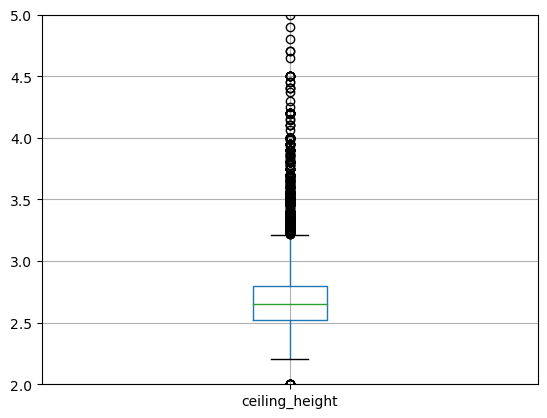

In [24]:
# Построим диаграмму размаха
plt.ylim(2, 5)
data.boxplot(column=['ceiling_height']);

**Вывод:**

Как видим максимальное значение равно 100м, что невозможно для квартир. Обычно диапазон высоты потоков от 2 до 3,25, что подтверждается диаграммой размаха. Чтобы не искажать данные сильно, возьмем пределом значения от 2 до 4 метров. Не будем удалять строки с аномалией, чтобы не потерять возможные уникальные значения других столбцов. Превратим аномалии в NaN.

In [25]:
# Создадим функцию превращающую все анамальные значения в NaN.
def ceiling_height_filter(row):
    try:
        if row > 4:
            row = row / 10
        if row < 2 or row > 4:
            row = np.nan
        return row
    except: 
        return print('Errors:' + row)

In [26]:
# Применим функцию
data['ceiling_height'] = data['ceiling_height'].apply(ceiling_height_filter)

In [27]:
# Узнаем изменилось ли количество NaN для столбца после римнения функции.
data['ceiling_height'].isna().sum()

9251

#### Аномалии в kitchen_area

**На гистограмме видны странные значения для 'kitchen_area'. Узнаем среднее, медианное, максимальное и минимальное значение, чтобы подтвердить наличие аномалии.** 

In [28]:
#Выведем диапазон значений площади кухни
data['kitchen_area'].describe()

count    21421.000000
mean        10.569807
std          5.905438
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

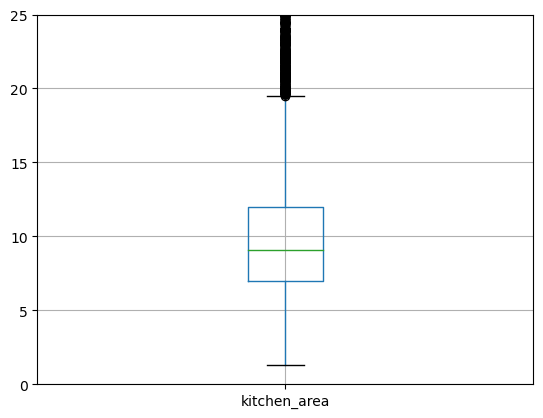

In [29]:
# Построим диаграмму размаха
plt.ylim(0, 25)
data.boxplot(column=['kitchen_area']);

**Вывод:**

В среднем нормой считаются квартиры с площадью кухни от 6 до 18 кв.м.. Хотя есть значения выше нормы, а максимальное значение  равно 112 кв.м., мы не будем считать ее аномалией, так как в жизни существуют элитные квартиры с таким значением. К примеру в Москве была продана 5 комнатная квартира с кухней 100 кв.м.

#### Аномалии в rooms

**На гистограмме видны странные значения для 'room'. Узнаем среднее, медианное, максимальное и минимальное значение, чтобы подтвердить наличие аномалии.**

In [30]:
#Выведем описание
data['rooms'].describe()

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

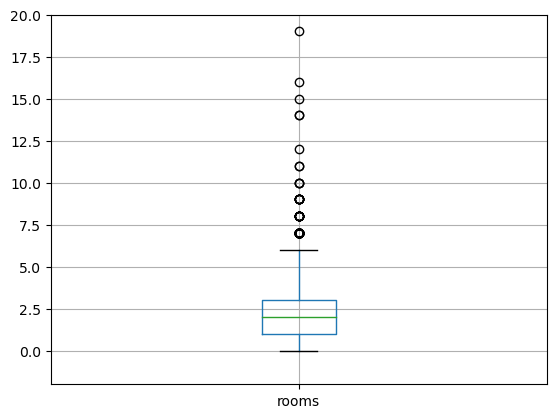

In [31]:
# Построим диаграмму размаха
plt.ylim(-2, 20)
data.boxplot(column=['rooms']);

**Вывод:**

Как видим минимальное значение равно 0, что в реальности не возможно. Поступим аналогично с потолками.

In [32]:
#  Заменим аномальное значение на NaN
data.loc[data['rooms'] == 0, 'rooms'] = np.nan

In [33]:
#Выведем min чтобы удостовериться, что все сработало
data['rooms'].min()

1.0

#### Аномалии в last_price

In [34]:
#Выведем описание
data['last_price'].describe()

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

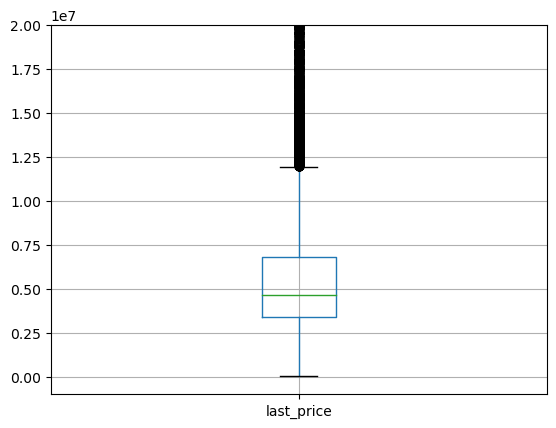

In [35]:
# Построим диаграмму размаха
plt.ylim(-1000000, 20000000)
data.boxplot(column=['last_price']);

**Выводы:**

Есть аномальное значение равное 12190р. Заменим его на NаN, а остальные значения оставим как есть.

In [36]:
#  Заменим аномальное значение на NaN
data.loc[data['last_price'] == 12190, 'last_price'] = np.nan

In [37]:
#Выведем min чтобы удостовериться, что все сработало
data['rooms'].min()

1.0

**Выводы по предобработке данных:**

Несмотря на отсутствующие значения и аномалии, нам удалось привести данные к должному виду для исследований. Причинами аномалий и пропусков могут быть: неверный ввод данных, сокрытие информации, повреждение файла данных при сохранении, технические проблемы. Советую сделать столбцы с пропусками в данных объязательными к заполнению клиентом.

## Добавим в таблицу новые столбцы

**Добавим новые параметры в таблицу для дальнейшего анализа:**
- цена одного квадратного метра;
- день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
- месяц публикации объявления;
- год публикации объявления;
- тип этажа квартиры (значения — «первый», «последний», «другой»);
- расстояние до центра города в километрах (переведите из м в км и округлите до целых значений).

In [38]:
#цена одного квадратного метра
data['price_one_square'] = (data['last_price'] / data['total_area']).round(2)

In [39]:
#день недели публикации объявления
data['day_of_week'] = data['first_day_exposition'].dt.weekday

In [40]:
#месяц публикации объявления
data['month_exposition'] = data['first_day_exposition'].dt.month

In [41]:
#год публикации объявления
data['year_exposition'] = data['first_day_exposition'].dt.year

In [42]:
# Создадим функцию распределения этажей по категориям
def type_floors(row):
    try:
        if row['floors_total'] == row['floor']:
            return 'последний'
        if row['floor'] == 1:
            return 'первый'
        else:
            return 'другой'
    except:
        return print(row)

In [43]:
# Применим функцию
data['type_floors'] = data.apply(type_floors, axis=1)

In [44]:
#расстояние до центра города в километрах 
data['city_centers_nearest_km'] = (data['city_centers_nearest'] / 1000).round()

In [45]:
# Вывудем первые 5 строчек таблицы для проверки
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_one_square,day_of_week,month_exposition,year_exposition,type_floors,city_centers_nearest_km
0,20,13000000.0,108.0,2019-03-07,3.0,2.70,16.0,51.0,8,NaN,...,482.0,2,755.0,NaN,120370.37,3,3,2019,другой,16.0
1,7,3350000.0,40.4,2018-12-04,1.0,NaN,11.0,18.6,1,NaN,...,NaN,0,NaN,81.0,82920.79,1,12,2018,первый,19.0
2,10,5196000.0,56.0,2015-08-20,2.0,NaN,5.0,34.3,4,NaN,...,90.0,2,574.0,558.0,92785.71,3,8,2015,другой,14.0
3,0,64900000.0,159.0,2015-07-24,3.0,NaN,14.0,NaN,9,NaN,...,84.0,3,234.0,424.0,408176.10,4,7,2015,другой,7.0
4,2,10000000.0,100.0,2018-06-19,2.0,3.03,14.0,32.0,13,NaN,...,112.0,1,48.0,121.0,100000.00,1,6,2018,другой,8.0


## Исследовательский анализ данных

### Изучим параметры данных, и построем для каждой гистограмму

**Изучим следующие параметры объектов:**
- общая площадь
- жилая площадь
- площадь кухни
- цена объекта
- количество комнат
- высота потолков
- этаж квартиры
- тип этажа квартиры («первый», «последний», «другой»)
- общее количество этажей в доме
- расстояние до центра города в метрах
- расстояние до ближайшего аэропорта
- расстояние до ближайшего парка
- день и месяц публикации объявления.
<br>**Построем отдельные гистограммы для каждого из этих параметров. Выведем для каждого описание**

#### Oбщая площадь

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64


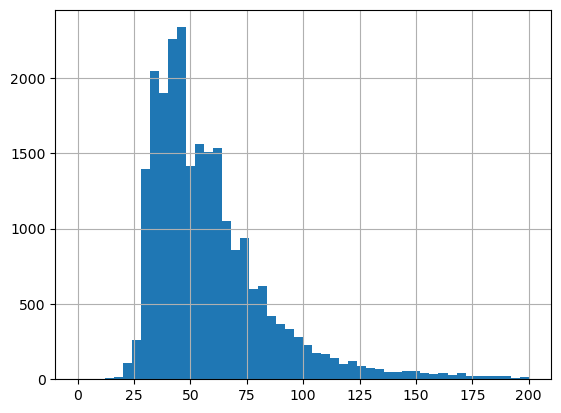

In [46]:
print(data['total_area'].describe())
data['total_area'].hist(bins=50, range=(0, 200));

**Вывод:** <br>
Основная часть рынка квартир находится в диапазоне от 30 до 100 кв.м.. Квартиры с общей площадью более 100 кв. м. можно отнести к категории элитных. Большего всего клиенты покупают квартиры с площадью от 40 до 48 кв.м.. 75% рынка приходятся на квартиры до 70 кв. м.

#### Жилая площадь

count    21796.000000
mean        34.457852
std         22.030445
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64


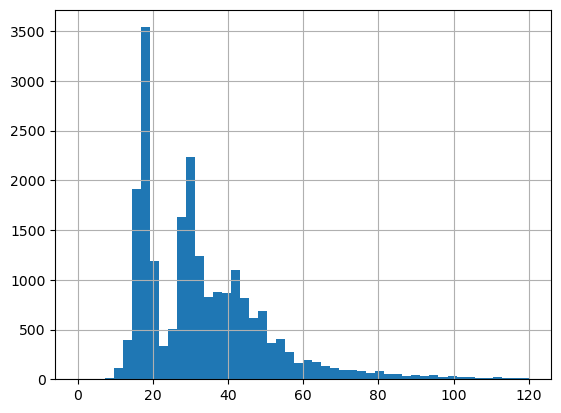

In [47]:
print(data['living_area'].describe())
data['living_area'].hist(bins=50, range=(0, 120));

**Вывод:** <br>
Наиболее распространены квартиры с жилой площадью 18 кв.м. и 30 кв.м.. 75% квартир имеют жилплощадь менее 42 кв.м.. Квартиры с жилплощадью 55 кв.м. и выше можно отнести к категории элитных.

#### Площадь кухни

count    21421.000000
mean        10.569807
std          5.905438
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64


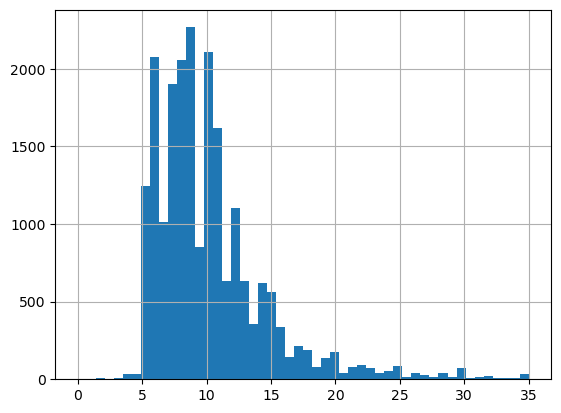

In [48]:
print(data['kitchen_area'].describe())
data['kitchen_area'].hist(bins=50, range=(0, 35));

**Вывод:** <br>
Самая распространеная планировка квартиры имеет 8 кв.м. Вторые по популярности квартиры с кухней 6 и 10 кв.м.. Основная часть квартир имеют кухню  в пределах 5-12 кв.м. Выше 20 кв.м. можно считать элитными квартирами.

#### Цена объекта

count    2.369800e+04
mean     6.541824e+06
std      1.088716e+07
min      4.300000e+05
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64


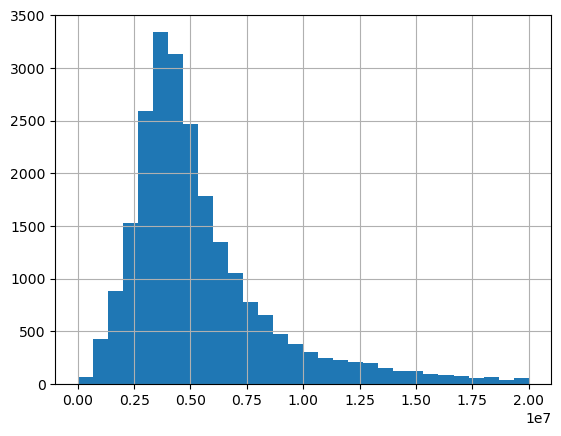

In [49]:
print(data['last_price'].describe())
data['last_price'].hist(bins=30,  range=(0, 20000000));

**Вывод:** <br>
На рынке большего всего квартир со стоимостью от 3000000 до 4000000. В основном цены колеблются от 1 млн. до 8 млн. В среднем люди покупают квартиры в пределах 3 - 7 млн. 

#### Количество комнат

count    23502.000000
mean         2.087993
std          1.066050
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64


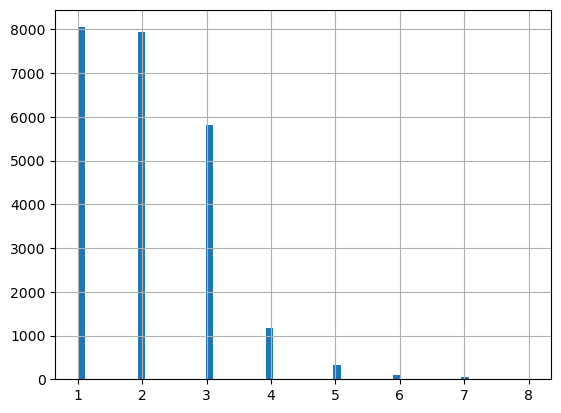

In [50]:
print(data['rooms'].describe())
data['rooms'].hist(bins=60, range=(1, 8));

**Вывод:** <br>
Большего всего на рынке 1 комнатных квартир. На втором месте 2-х комнатные. Причем 1 и 2 комнатные распространены примерно в одинаковом количестве. Единицы покупали квартиры с количеством комнат больше 7. 75% рынка приходятся на квартиры с количеством комнат меньше 4.

#### Высота потолков

count    14448.000000
mean         2.720839
std          0.258155
min          2.000000
25%          2.510000
50%          2.650000
75%          2.800000
max          4.000000
Name: ceiling_height, dtype: float64


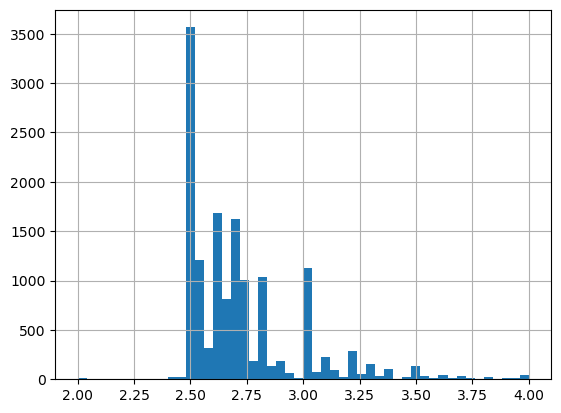

In [51]:
print(data['ceiling_height'].describe())
data['ceiling_height'].hist(bins=50);

**Вывод:** <br>
Наиболее распространены квартиры с потолками 2.5м В основном  распространены потолки от 2 до 3 метров. Но бывают потолки и до 3.5 метров. Потолки выше 3.5м имеют единицы.

#### Этаж квартиры

count    23699.000000
mean         5.892358
std          4.885249
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64


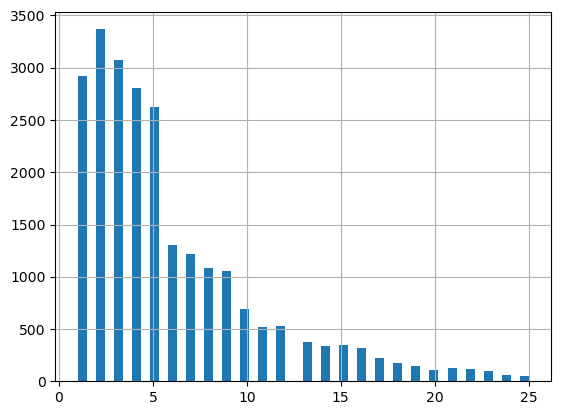

In [52]:
print(data['floor'].describe())
data['floor'].hist(bins=50, range=(1, 25));

**Вывод:** <br>
Наиболее распространнеый этаж при продаже: 2. На втором месте 3. На третьем 1. 

#### Тип этажа

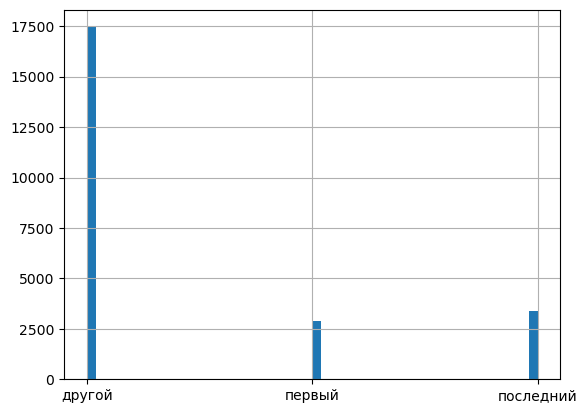

In [53]:
data['type_floors'].hist(bins=50);

**Вывод:** <br>
Меньше всего на рынке квартир на 1 этаже. В основном распространены квартиры между первым и последним этажом.

#### Общее количество этажей

count    23613.000000
mean        10.673824
std          6.597173
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64


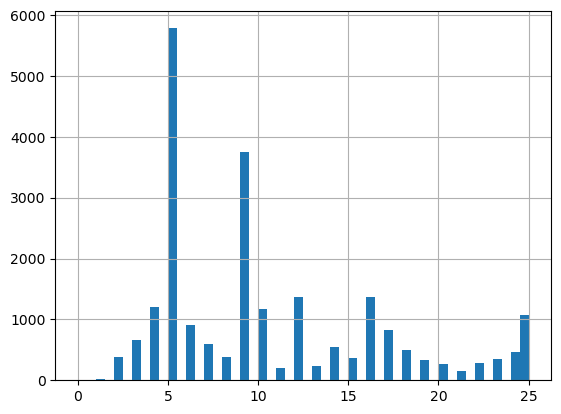

In [54]:
print(data['floors_total'].describe())
data['floors_total'].hist(bins=50, range=(0, 25));

**Вывод:** <br>
Большего всего квартир продают в 5 этажках. На втором месте 9 этажки. 75% квартир находятся в зданиях до 16 этажей. Наиболее распространены 5, 9, 12, 16 этажки

#### Удаленность от центра города

count    18180.000000
mean     14191.277833
std       8608.386210
min        181.000000
25%       9238.000000
50%      13098.500000
75%      16293.000000
max      65968.000000
Name: city_centers_nearest, dtype: float64


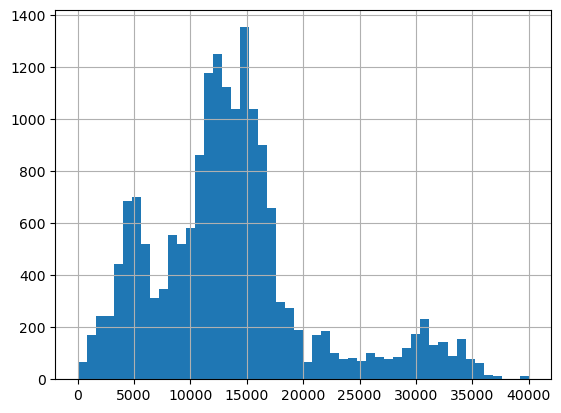

In [55]:
print(data['city_centers_nearest'].describe())
data['city_centers_nearest'].hist(bins=50, range=(0, 40000));

**Вывод:** <br>
Больше всего квартир на удалении от центра города 15км В основном продаются квартиры в пределах 18 км от центра. Большое количество квартир на рынке находятся на удалении 10-16км от центра.

#### Удаленность от аэропорта

count    18157.000000
mean     28793.672193
std      12630.880622
min          0.000000
25%      18585.000000
50%      26726.000000
75%      37273.000000
max      84869.000000
Name: airports_nearest, dtype: float64


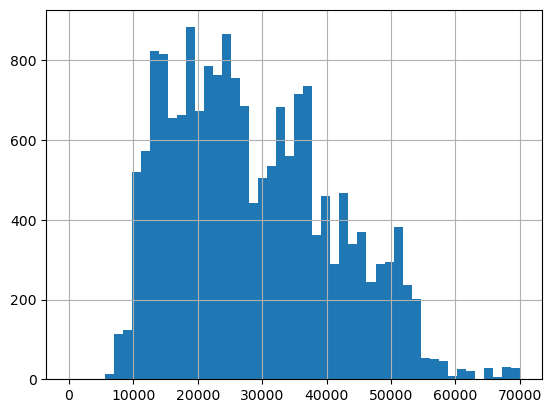

In [56]:
print(data['airports_nearest'].describe())
data['airports_nearest'].hist(bins=50, range=(0, 70000));

**Вывод:** <br>
Больше всего квартир на расстояни: 19, 12-14, 24, 25км от аэропорта. Квартиры больше 55км мало распространены.Больше всего квартир продают на удалении от 10 до 25 км.

#### Удаленность от парка

count    8079.000000
mean      490.804555
std       342.317995
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64


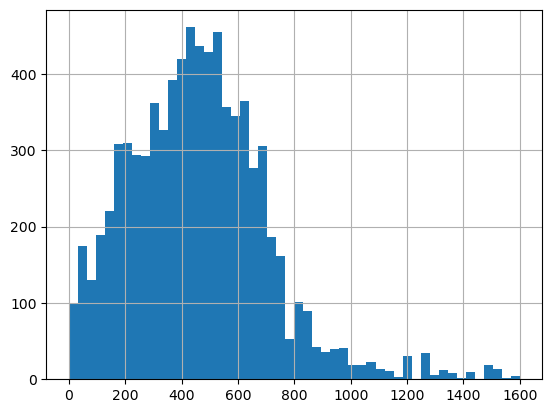

In [57]:
print(data['parks_nearest'].describe())
data['parks_nearest'].hist(bins=50, range=(0, 1600));

**Вывод:** <br>
Больше всего квартир на расстояни: 440-450м от парка. Квартиры больше 55км мало распространены. Больше всего квартир продают на удалении от 10 до 25 км. В основном квартиры находятся на удалении от 100 до 700 метров.

#### Дни недели

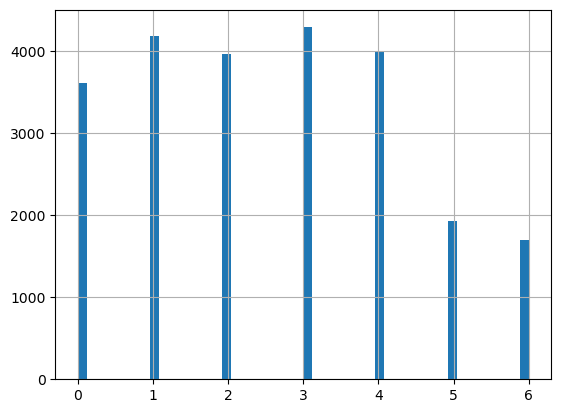

In [58]:
data['day_of_week'].hist(bins=50);

**Вывод:** <br>
Большинство объявлений было в будни, особенно в четверг.

#### Месяцы

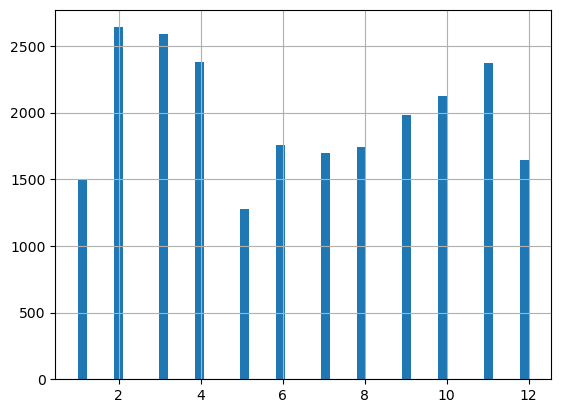

In [59]:
data['month_exposition'].hist(bins=50);

**Вывод:** <br>
Больше всего объявлений в феврале и марте. Чаще всего обьявления дают  с февраля по март, и с сентября по ноябрь. В дождливые дни все уезжают из Санкт-Петербургской области =)

 **Вывод по параметрам квартир:**
 
Чаще всего обьявления дают с февраля по март, и с сентября по ноябрь.Большинство объявлений было в будни, особенно в четверг.

Больше всего на рынке квартир со следующими параметрами:
 - Общая площадь от 40 до 50 кв.м.
 - Жилая площадь 18 кв.м.
 - Площадь кухни  8 кв.м.
 - Цена объекта  от 3000000 до 4000000р.
 - Количество комнат 1 или 2.
 - Высота потолков  2.5м
 - Этаж квартиры 2.
 - Тип этажа квартиры «другой».
 - Общее количество этажей в доме 5.
 - Расстояние до центра города 15км. 
 - Расстояние до ближайшего аэропорта 19км
 - Расстояние до ближайшего парка 440-450м
 
 

### Изучим как быстро продавались квартиры

In [60]:
data['days_exposition'].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

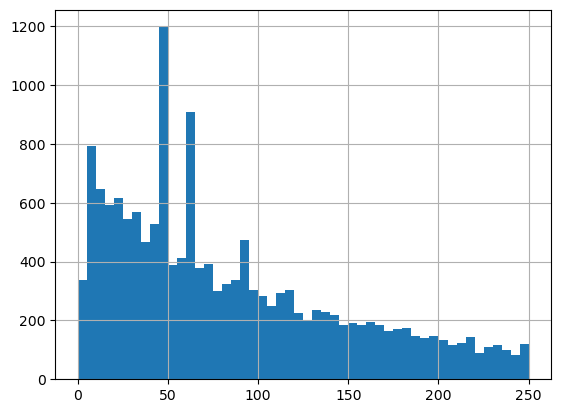

In [61]:
data['days_exposition'].hist(bins=50, range=(0, 250));

**Вывод:** <br>
Боьшинство квартир было продано за 150 дней. В среднем квартиры висят по полгода. Больше 50% было продано за 95 дней. Самые быстрые продажи занимают меньше 45 дней. Самые медленные больше 232 дней. 

### Факторы больше всего влияющие на полную стоимость квартир

**Изучим, зависит ли цена от:**
 - общей площади;
 - жилой площади;
 - площади кухни;
 - количества комнат;
 - этажа, на котором расположена квартира (первый, последний, другой);
 - даты размещения (день недели, месяц, год).<br>

**Построем графики, которые покажут зависимость цены от указанных выше параметров. Посмотрим коэффициент корреляции. <br>Величина коэффициента корреляции по модулю:** 
- 0 — нет никакой связи: 
- 0.1–0.3 — слабая связь;
- 0.31–0.7 — умеренная связь; 
- 0.71–0.99 — сильная связь; 
- 1 — совершенная связь.

#### Зависимость от общей площади

In [62]:
# Создадим сводную таблицу
dependence_on_total_area = (data
                            .pivot_table(index='total_area', values='last_price', aggfunc=(['count', 'median']))
                            .reset_index()
                           )
dependence_on_total_area.columns = ['total_area','count', 'last_price']

In [63]:
# Избавимся от единичных значений
dependence_on_total_area = dependence_on_total_area.query('count > 1')

In [64]:
# Узнаем коэффициент корреляции
dependence_on_total_area.corr()

,total_area,count,last_price
total_area,1.000000,-0.200998,0.794324
count,-0.200998,1.000000,-0.141962
last_price,0.794324,-0.141962,1.000000


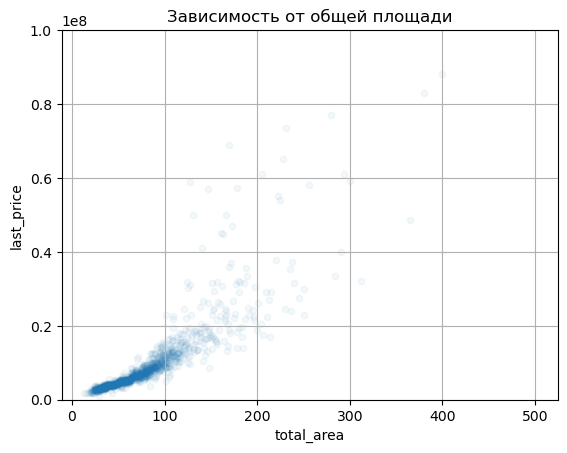

In [65]:
# Построим график рассеяния
dependence_on_total_area.plot(kind='scatter', x='total_area', y='last_price', title='Зависимость от общей площади',\
                              grid=True,  ylim=(0, 100000000), alpha=0.05);

**Вывод:**<br>
Зависимость цены от общей площади сильная. Коэффициент корреляции положительный и составляет 0.794. Наличие такой связи подтверждается графиком. Чем больше площадь, тем выше цена. Так же заметим, что, в основном, в данных преобладают квартиры со стоимостью до 20млн, и общей площадью до 160 кв.м.

#### Зависимость от жилплощади

In [66]:
# Создадим сводную таблицу
dependence_on_living_area = (
    data
    .pivot_table(index='living_area', values='last_price', aggfunc=(['count', 'median']))
    .reset_index()
)
dependence_on_living_area.columns = ['living_area', 'count', 'last_price']

In [67]:
# Избавимся от единичных значений
dependence_on_living_area = dependence_on_living_area.query('count > 1')

In [68]:
# Узнаем коэффициент корреляции
dependence_on_living_area.corr()

,living_area,count,last_price
living_area,1.000000,-0.187144,0.783993
count,-0.187144,1.000000,-0.144122
last_price,0.783993,-0.144122,1.000000


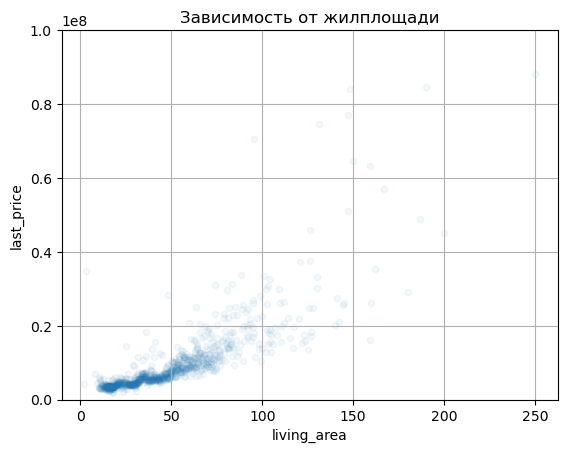

In [69]:
# Построим график рассеяния
dependence_on_living_area.plot(kind='scatter', x='living_area', y='last_price', title='Зависимость от жилплощади', \
                                             grid=True, ylim=(0, 100000000), alpha=0.05);

**Вывод:**<br>
Зависимость цены от жилплощади сильная. Коэффициент корреляции положительный и составляет 0.783. Наличие такой связи подтверждается графиком. Чем больше площадь, тем выше цена. Так же заметим, что, в основном, в данных преобладают квартиры со стоимостью до 17 млн, и жилплощадью  до 70 кв.м.

#### Зависимость от площади кухни

In [70]:
# Создадим сводную таблицу
dependence_on_kitchen_area = (
    data
    .pivot_table(index='kitchen_area', values='last_price', aggfunc=(['count', 'median']))
    .reset_index()
)
dependence_on_kitchen_area.columns = ['kitchen_area', 'count', 'last_price']

In [71]:
# Избавимся от единичных значений
dependence_on_kitchen_area = dependence_on_kitchen_area.query('count > 1')

In [72]:
# Узнаем коэффициент корреляции
dependence_on_kitchen_area.corr()

,kitchen_area,count,last_price
kitchen_area,1.000000,-0.176551,0.681179
count,-0.176551,1.000000,-0.114291
last_price,0.681179,-0.114291,1.000000


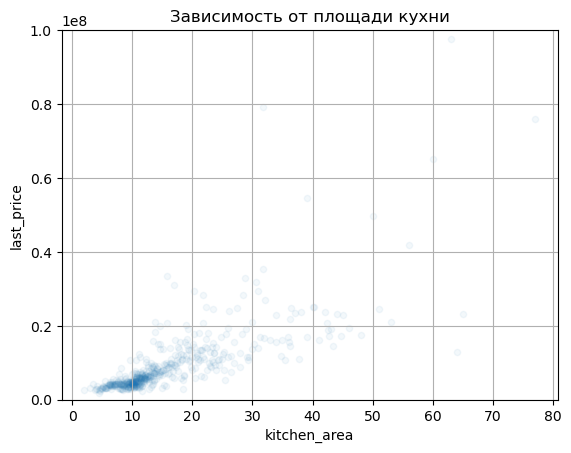

In [73]:
# Построим график рассеяния
dependence_on_kitchen_area.plot(kind='scatter', x='kitchen_area', y='last_price',title='Зависимость от площади кухни',
                                grid=True, ylim=(0, 100000000), alpha=0.05);

**Вывод:**<br>
Зависимость цены от площади кухни умеренная, можно сказать сильная. Коэффициент корреляции положительный и составляет 0.683. Наличие такой связи подтверждается графиком. Чем больше площадь, тем выше цена. Так же заметим, что, в основном, в данных преобладают квартиры со стоимостью до 16 млн, и площадью кухни до 18 кв.м.

#### Зависимость от количества комнат

In [74]:
# Создадим сводную таблицу
dependence_on_rooms = (
    data
    .pivot_table(index='rooms', values='last_price', aggfunc=(['count', 'median']))
    .reset_index()
)
dependence_on_rooms.columns = ['rooms', 'count', 'last_price']

In [75]:
# Избавимся от единичных значений
dependence_on_rooms = dependence_on_rooms.query('count > 1')

In [76]:
# Узнаем коэффициент корреляции
dependence_on_rooms.corr()

,rooms,count,last_price
rooms,1.000000,-0.765942,0.919538
count,-0.765942,1.000000,-0.865756
last_price,0.919538,-0.865756,1.000000


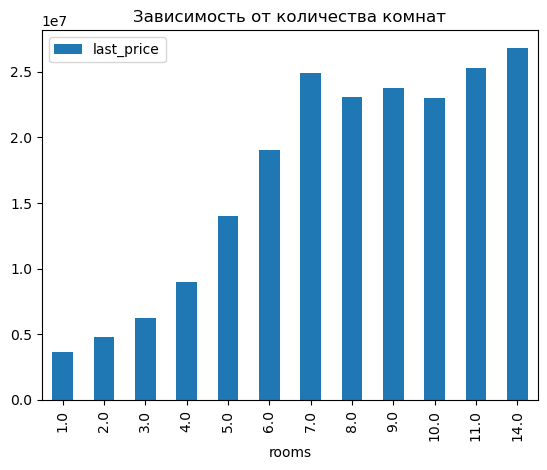

In [77]:
# Построим график рассеяния
dependence_on_rooms.plot(kind='bar', x='rooms', y='last_price', title='Зависимость от количества комнат');

**Вывод:**<br>
Зависимость цены от количества комнат сильная. Коэффициент корреляции положительный и составляет 0.91. Наличие такой связи подтверждается графиком. Чем больше комнат, тем выше цена. 

#### Зависимость от типа этажа

In [78]:
# Создадим сводную таблицу
dependence_on_type_floors = (
    data
    .pivot_table(index='type_floors', values='last_price', aggfunc=(['count', 'median']))
    .reset_index()
)
dependence_on_type_floors.columns = ['type_floors', 'count', 'last_price']

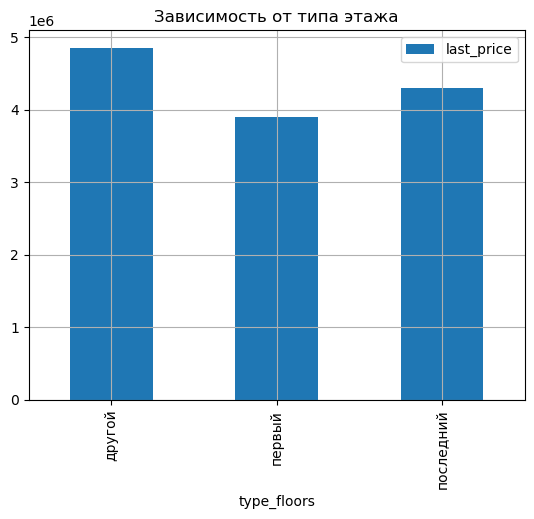

In [79]:
# Построим график рассеяния
(
    dependence_on_type_floors
    .plot(kind='bar', x='type_floors', y='last_price', grid=True, legend=True, title='Зависимость от типа этажа')
);

**Вывод:**<br>
Квартиры на других этажах самые дорогие. Квартиры на первом самые дешевые. Большинство покупателей предпочитаю этажи между последним и первым.

#### Зависимость от дня недели

In [80]:
# Создадим сводную таблицу
dependence_on_day_of_week = (
    data
    .pivot_table(index='day_of_week', values='last_price', aggfunc=(['count', 'mean']))
    .reset_index()
)
dependence_on_day_of_week.columns = ['day_of_week', 'count',  'last_price']

In [81]:
# Узнаем коэффициент корреляции
dependence_on_day_of_week.corr()

,day_of_week,count,last_price
day_of_week,1.000000,-0.719674,0.034906
count,-0.719674,1.000000,-0.097427
last_price,0.034906,-0.097427,1.000000


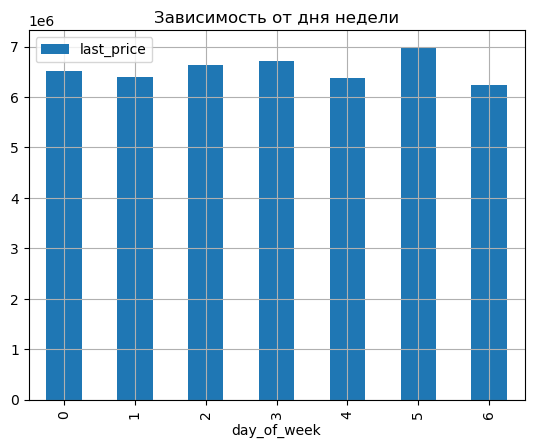

In [82]:
# Построим график рассеяния
dependence_on_day_of_week.plot(kind='bar', x='day_of_week', y='last_price', grid=True, title='Зависимость от дня недели');

**Вывод:**<br>
Коэффициент корреляции всего 0,03.
Связи между днем публикации и цены нет.

#### Зависимость от месяца

In [83]:
# Создадим сводную таблицу
dependence_on_day_of_month = (
    data
    .pivot_table(index='month_exposition', values='last_price', aggfunc=(['count', 'median']))
    .reset_index()
)
dependence_on_day_of_month.columns = ['month', 'count',  'last_price']

In [84]:
# Узнаем коэффициент корреляции
dependence_on_day_of_month.corr()

,month,count,last_price
month,1.000000,-0.134345,0.109797
count,-0.134345,1.000000,0.477999
last_price,0.109797,0.477999,1.000000


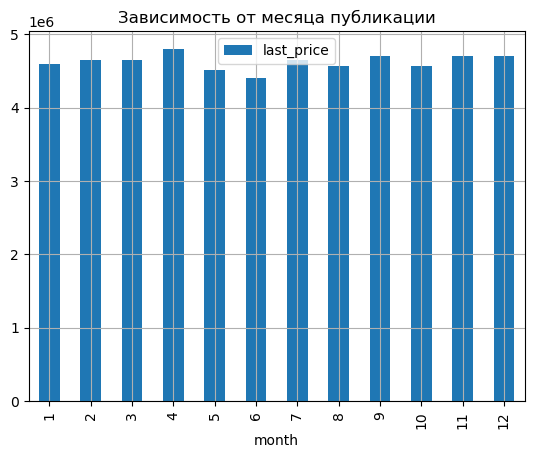

In [85]:
# Построим график рассеяния
dependence_on_day_of_month.plot(kind='bar', x='month', y='last_price', grid=True, title='Зависимость от месяца публикации');

**Вывод:**<br>
 Коэффициент корреляции всего 0,109. Связь настолько слабая, что можно считать, что между ценой и месяцом публикации нет взамосвязи.

#### Зависисмость от года

In [86]:
# Создадим сводную таблицу
dependence_on_day_of_year = (
    data
    .pivot_table(index='year_exposition', values='last_price', aggfunc=(['count', 'median']))
    .reset_index()
)
dependence_on_day_of_year.columns = ['year', 'count',  'last_price']

In [87]:
dependence_on_day_of_year.corr()

,year,count,last_price
year,1.000000,0.616326,-0.681204
count,0.616326,1.000000,-0.681639
last_price,-0.681204,-0.681639,1.000000


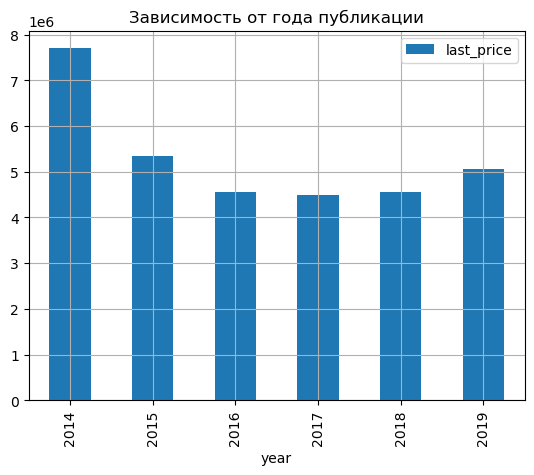

In [88]:
# Построим график рассеяния
dependence_on_day_of_year.plot(kind='bar', x='year', y='last_price', grid=True, title='Зависимость от года публикации');

**Вывод:**<br>
Коэффициент корреляции отрицательный 0,68. Есть умеренная связь между годом публикации и ценой. По графику можно заметить что самая высокая цена была в 2014 году. С 2016-2018 цена практически не менялась. В 2019 году цена снова повысилась. Такая тенденция понятна, так как на цену мог повлиять экономический кризис 2014-2015г.

**Вывод по факторам больше всего влияющих на полную стоимость:**

Дороже квартиры  между первым и последним этажом. Зависимость от дня недели и месяца публикации не найдена.
Больше всего на стоимость квартиры оказывают влияние следующие параметры:
 - Количество комнат с положительным коэффициентом корреляции 0.91
 - Общая площадь с положительным коэффициентом корреляции 0.794
 - Жилая площадь с положительным коэффициентом корреляции 0.783
 - Площадь кухни с положительным коэффициентом корреляции 0.681
 - Год публикации 


### Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделим населённые пункты с самой высокой и низкой стоимостью квадратного метра.

In [89]:
# Создадим сводную таблицу, и отсортируем по количеству объявлений о продаже квартиры
top_10 = (data
        .pivot_table(index='locality_name', values='price_one_square', aggfunc=(['count', 'median']))
        .reset_index()
        .sort_values(by=('count', 'price_one_square'), ascending=False))
top_10.columns = ['locality_name', 'count', 'median']

In [90]:
# Выведем топ 10
top_10.head(10)

,locality_name,count,median
47,Санкт-Петербург,15720,104766.085
247,посёлок Мурино,556,85878.465
307,посёлок Шушары,440,76876.175
17,Всеволожск,398,65789.470
46,Пушкин,369,100000.000
27,Колпино,338,74723.745
254,посёлок Парголово,327,91642.860
20,Гатчина,307,67796.610
93,деревня Кудрово,299,91860.470
18,Выборг,237,58158.320


**Вывод:**<br>
Больше всего объявлений было в Санкт-Петербуре, а также там самая большая средняя цена за 1кв.м. - 104766р. Среди топа 10 по количеству объявлений в Выборге средняя цена за 1 кв.м. самая дешевая, и составляет всего 58158р.

In [91]:
#Выведем таблицу отсортированную по средней цене за 1 кв.м.
top_10.sort_values(by='median', ascending=False)

,locality_name,count,median
47,Санкт-Петербург,15720,104766.085
21,Зеленогорск,24,101666.665
46,Пушкин,369,100000.000
31,Кудрово,173,100000.000
50,Сестрорецк,183,99678.460
...,...,...,...
286,посёлок Совхозный,2,12629.130
72,деревня Выскатка,2,12335.480
71,деревня Вахнова Кара,1,11688.310
316,посёлок станции Свирь,2,11481.480


**Вывод:**<br>
Самая большая средняя цена за 1 кв.м. среди всех представленных городов у Санкт-Петербурга - 104766р. Самая маленькая средняя цена за 1 кв.м. в деревне Старополье - 11000р.

### Зависимость объектов от расстояния до центра города в Санкт-Петербурге.

In [92]:
#Создадим сводную таблицу
dependence_price_on_distance_to_center = (
    data
    .query('locality_name == "Санкт-Петербург" ')
    .pivot_table(index='city_centers_nearest_km', values='last_price', aggfunc=(['count', 'median']))
    .reset_index()
)
dependence_price_on_distance_to_center.columns = ['distance', 'count', 'median']


In [93]:
# Узнаем коэффициент корреляции
dependence_price_on_distance_to_center.corr()

,distance,count,median
distance,1.000000,-0.341101,-0.709222
count,-0.341101,1.000000,-0.147693
median,-0.709222,-0.147693,1.000000


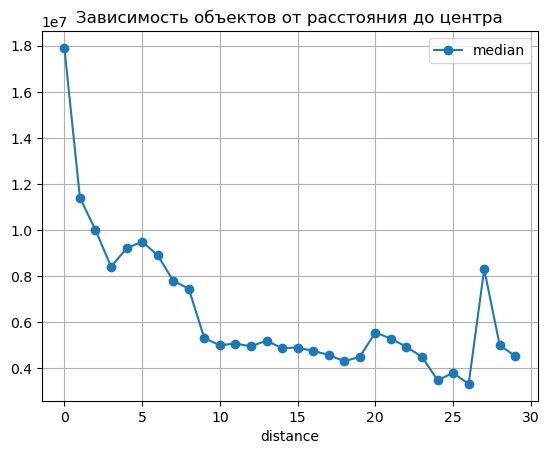

In [94]:
# Выведем график зависимости цены от до центра города.
dependence_price_on_distance_to_center.plot(marker='o', x='distance', y='median', 
                                            grid=True, title = 'Зависимость объектов от расстояния до центра');

**Вывод:**<br>
Как видим по мере удаления от центра цена за квартиру уменьшается. Зависимость сильная, коэффициент корреляции отрицательный и равен: 0,709. Мы можем наблюдать резкое падение цены на промежутке от 0 до 3 км.  Пик у 5км, скорее всего связан с элитностью квартир в данном радиусе. На промежутке с 10 до 20км цена падает с маленькой скоростью. Пик у 27км, скорее всего, неучтенный  вброс.

## Общий вывод

**Что было сделано:**

Входе исследования были выявлены и отработаны пропущенные и аномальные значения в данных. Исследованы параметры квартиры, чтобы выяснить предпочтения среднего покупателя. Выявлены факторы больше всего влияющие на ценообразование. Проведен анализ средней стоимости квадратного метра в Ленринградской области и в Санкт-Петербурге. Выявлена зависимоть объектов от расстояния квартиры до центра города.

**Итак, самое большое влияние на формирование цены квартиры оказывают:**<br>
 - Количество комнат с положительным коэффициентом корреляции 0.91
 - Общая площадь с положительным коэффициентом корреляции 0.794
 - Жилая площадь с положительным коэффициентом корреляции 0.783
 - Площадь кухни с положительным коэффициентом корреляции 0.681
 - Удаленность от центра города с отрицательным коэффициентом корреляции 0.709 
 - Год публикации. Связано с экономикой страны.

**Характеристики самой распространенной квартиры при продаже:**<br>
 - Общая площадь от 40 до 50 кв.м.
 - Жилая площадь 18 кв.м.
 - Площадь кухни  8 кв.м.
 - Цена объекта  от 3000000 до 4000000р.
 - Количество комнат 1 или 2.
 - Высота потолков  2.5м
 - Этаж квартиры 2.
 - Тип этажа квартиры «другой».
 - Общее количество этажей в доме 5.
 - Расстояние до центра города 15км. 
 - Расстояние до ближайшего аэропорта 19км
 - Расстояние до ближайшего парка 440-450м

**Основная часть рынка заполнена квартирами со следующими параметрами:**

 - Общая площадь от  30 до 100 кв.м.
 - Жилая площадь от 18 кв.м. до 50 кв.м
 - Площадь кухни от 5 до 15 кв.м.
 - Цена объекта  от 1 млн. до 8 млн.
 - Количество комнат от 1 до 4
 - Высота потолков  от 2 до 3 метров.
 - Этаж квартиры с 2 по 10.
 - Тип этажа квартиры «другой».
 - Расстояние до центра города от 4 до 17км. 
 - Расстояние до ближайшего аэропорта от 10 до 50км
 - Расстояние до ближайшего парка от 100-700м
 
Советую использовать эти данные, для автоматизации поиска вбросов и мошенической деятельности. 

**Интересные наблюдения:**
- Среднее время продажи квартиры 180 дней. Самые быстрые продажи занимают меньше 45 дней. Самые медленные больше 232 дней.
- Самая большая средняя цена за 1кв.м. ,среди топа 10 по количеству объявлений, в Санкт-Петербурге - 104766р.
- Среди топа 10 по количеству объявлений в Выборге средняя цена за 1 кв.м. самая дешевая - 58158р.
- Самая большая средняя цена за 1 кв.м., среди всех представленных городов, в Санкт-Петербурге- 115122р. 
- Самая маленькая средняя цена за 1 кв.м., среди всех представленных данных, в деревне Старополье - 11000р.
- Чаще всего обьявления дают  с февраля по март, и с сентября по ноябрь.Большинство объявлений было в будни, особенно в четверг.

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [ ]  открыт файл
- [ ]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [ ]  определены пропущенные значения
- [ ]  заполнены пропущенные значения там, где это возможно
- [ ]  есть пояснение, какие пропущенные значения обнаружены
- [ ]  изменены типы данных
- [ ]  есть пояснение, в каких столбцах изменены типы и почему
- [ ]  устранены неявные дубликаты в названиях населённых пунктов
- [ ]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [ ]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [ ]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [ ]  посчитано и добавлено в таблицу: месяц публикации объявления
- [ ]  посчитано и добавлено в таблицу: год публикации объявления
- [ ]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [ ]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [ ]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [ ]  построены гистограммы для каждого параметра
- [ ]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [ ]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [ ]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [ ]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [ ]  в каждом этапе есть промежуточные выводы
- [ ]  есть общий вывод